XGBoost - Cross-Validation Accuracy Scores: ['0.55804', '0.55574', '0.55574', '0.54625', '0.48699']
XGBoost - Mean CV Accuracy: 0.54055

XGBoost - Test Set Metrics:
Accuracy: 0.93915
Recall: 0.93651
Precision: 0.95414
F1-score: 0.94524



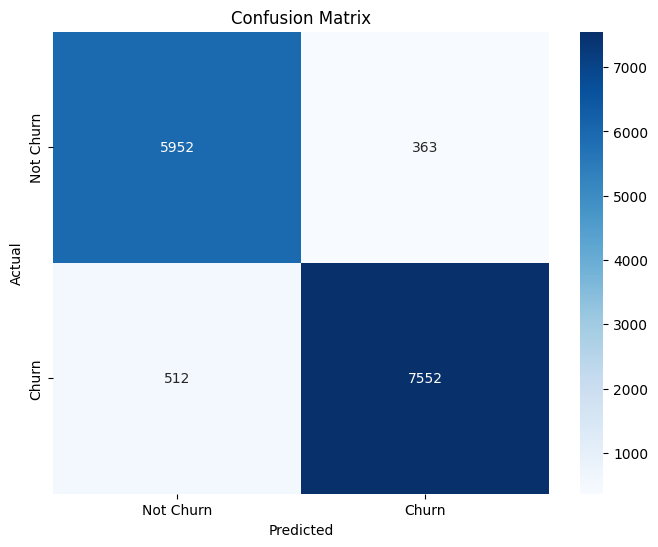


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6315
           1       0.95      0.94      0.95      8064

    accuracy                           0.94     14379
   macro avg       0.94      0.94      0.94     14379
weighted avg       0.94      0.94      0.94     14379


Model saved as 'xgboost_model.pkl'
Model loaded successfully!


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                           f1_score, confusion_matrix, classification_report)
import joblib

# Завантаження та підготовка даних
data = pd.read_csv('data_normalized.csv')
X = data.drop(columns=['id', 'churn'])
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Налаштування моделі
model = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.85,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# Крос-валідація
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("XGBoost - Cross-Validation Accuracy Scores:", [f"{score:.5f}" for score in cv_scores])
print(f"XGBoost - Mean CV Accuracy: {cv_scores.mean():.5f}\n")

# Тренування моделі
model.fit(X_train, y_train)

# Прогнозування та оцінка
y_pred = model.predict(X_test)
print("XGBoost - Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"F1-score: {f1_score(y_test, y_pred):.5f}\n")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Збереження моделі
joblib.dump(model, 'xgboost_model.pkl')
print("\nModel saved as 'xgboost_model.pkl'")

# Приклад завантаження
loaded_model = joblib.load('xgboost_model.pkl')
print("Model loaded successfully!")

Модель успішно завантажена з xgboost_model.pkl


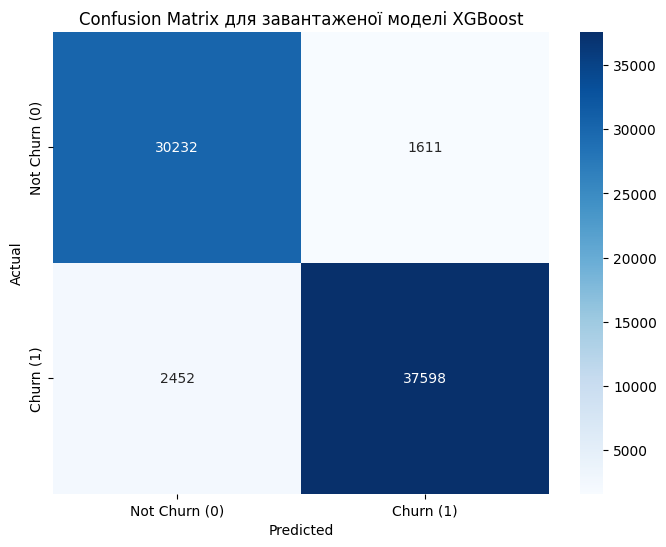


Classification Report для завантаженої моделі:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     31843
           1       0.96      0.94      0.95     40050

    accuracy                           0.94     71893
   macro avg       0.94      0.94      0.94     71893
weighted avg       0.94      0.94      0.94     71893


Детальна статистика:
Правильні негативні (True Negative): 30232
Помилкові позитивні (False Positive): 1611
Помилкові негативні (False Negative): 2452
Правильні позитивні (True Positive): 37598

Загальна точність: 0.9435


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# 1. Завантаження тестових даних
data = pd.read_csv('data_normalized.csv')
X_test = data.drop(columns=['id', 'churn'])
y_test = data['churn']

# 2. Завантаження збереженої моделі
try:
    model = joblib.load('xgboost_model.pkl')
    print("Модель успішно завантажена з xgboost_model.pkl")
except FileNotFoundError:
    print("Помилка: Файл моделі не знайдено. Спочатку навчіть та збережіть модель.")
    exit()

# 3. Прогнозування на тестових даних
y_pred = model.predict(X_test)

# 4. Confusion Matrix для завантаженої моделі
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn (0)', 'Churn (1)'],
            yticklabels=['Not Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix для завантаженої моделі XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Детальний звіт
print("\nClassification Report для завантаженої моделі:")
print(classification_report(y_test, y_pred))

# 6. Вивід кількості правильних/помилкових передбачень
tn, fp, fn, tp = cm.ravel()
print(f"\nДетальна статистика:")
print(f"Правильні негативні (True Negative): {tn}")
print(f"Помилкові позитивні (False Positive): {fp}")
print(f"Помилкові негативні (False Negative): {fn}")
print(f"Правильні позитивні (True Positive): {tp}")
print(f"\nЗагальна точність: {(tp + tn) / (tp + tn + fp + fn):.4f}")

Модель успішно завантажена з xgboost_model.pkl


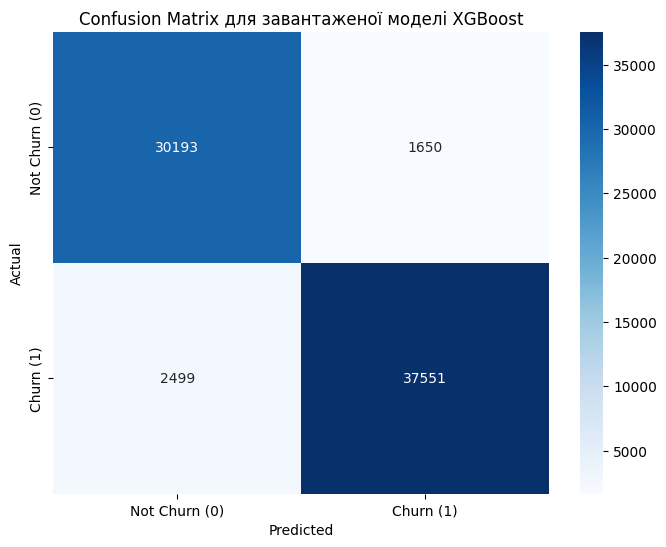


Classification Report для завантаженої моделі:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     31843
           1       0.96      0.94      0.95     40050

    accuracy                           0.94     71893
   macro avg       0.94      0.94      0.94     71893
weighted avg       0.94      0.94      0.94     71893


Детальна статистика:
Правильні негативні (True Negative): 30193
Помилкові позитивні (False Positive): 1650
Помилкові негативні (False Negative): 2499
Правильні позитивні (True Positive): 37551

Загальна точність: 0.9423


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# 1. Завантаження тестових даних
data = pd.read_csv('data_normalized.csv')
X_test = data.drop(columns=['id', 'churn'])
y_test = data['churn']

# 2. Завантаження збереженої моделі
try:
    model = joblib.load('xgboost_model1 (12).pkl') # модель яку ми використовуємо
    print("Модель успішно завантажена з xgboost_model.pkl")
except FileNotFoundError:
    print("Помилка: Файл моделі не знайдено. Спочатку навчіть та збережіть модель.")
    exit()

# 3. Прогнозування на тестових даних
y_pred = model.predict(X_test)

# 4. Confusion Matrix для завантаженої моделі
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn (0)', 'Churn (1)'],
            yticklabels=['Not Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix для завантаженої моделі XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Детальний звіт
print("\nClassification Report для завантаженої моделі:")
print(classification_report(y_test, y_pred))

# 6. Вивід кількості правильних/помилкових передбачень
tn, fp, fn, tp = cm.ravel()
print(f"\nДетальна статистика:")
print(f"Правильні негативні (True Negative): {tn}")
print(f"Помилкові позитивні (False Positive): {fp}")
print(f"Помилкові негативні (False Negative): {fn}")
print(f"Правильні позитивні (True Positive): {tp}")
print(f"\nЗагальна точність: {(tp + tn) / (tp + tn + fp + fn):.4f}")